# 例題8-3

Scikit learn の 多層ニューラルネットワークで識別を行います。

## 準備

必要なライブラリ等を読み込みます。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

## データの読み込み

digitsデータを読み込み、パターン行列をXに、教師ベクトルをyに格納します。
そして、digitsデータのデータ数や特徴の次元数・値などを表示させて確認します。

In [2]:
digits = load_digits()
X = digits.data
y = digits.target
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

パターン行列からデータを1つ取り出して、pyplotで表示します。表示対象が行列である必要がある点に気をつけてください。

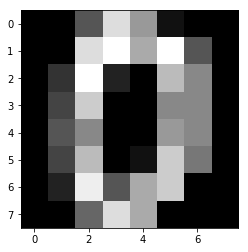

In [3]:
plt.gray()
plt.imshow(np.reshape(X[0],(8,8)))

教師ベクトルの最初の20要素程度を表示させて、どのようにデータが並んでいるのかを確認します。

In [4]:
y[0:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## 3層での学習

[MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)を使って学習し、10-fold CVで性能を評価します。

In [5]:
clf1 = MLPClassifier()
clf1.fit(X,y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [6]:
scores = cross_val_score(clf1, X, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.94 (+/- 0.05)


## 多層での学習

PCの性能に応じてhidden_layer_sizesとmax_iterを調整してください。

In [7]:
clf2 = MLPClassifier(activation='logistic', hidden_layer_sizes=(30,30,30,30,30), max_iter=500)
clf2.fit(digits.data, digits.target)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [8]:
scores = cross_val_score(clf2, digits.data, digits.target, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.46 (+/- 0.51)


中間層を5層にすると、精度が落ちています。

## 活性化関数をReluに変更

In [9]:
clf3 = MLPClassifier(activation='relu', hidden_layer_sizes=(30,30,30,30,30), max_iter=500)
clf3.fit(digits.data, digits.target)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [10]:
scores = cross_val_score(clf3, digits.data, digits.target, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.93 (+/- 0.08)


Reluの場合は多層にしても学習が可能です。さらに性能が上がる場合もあります。